<a href="https://colab.research.google.com/github/DixonManual/Stock_Prediction_ML_Model/blob/main/Stock_Close_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/sample_data/ADANIPORTS.csv")

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [5]:
df.dtypes

,0
Date,object
Symbol,object
Series,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64


In [6]:
df.size

49830

In [7]:
df.shape

(3322, 15)

In [8]:
df.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [9]:
df.drop(['Trades', 'Series'], axis=1,inplace=True)

In [10]:
df.isnull().sum()

,0
Date,0
Symbol,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,ADANIPORTS,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,ADANIPORTS,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,ADANIPORTS,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942


In [12]:
df['year']=df['Date'].dt.year

In [13]:
df['month']=df['Date'].dt.month

In [14]:
df['month_name']=df['Date'].dt.month_name()

In [15]:
df['day']=df['Date'].dt.day

In [16]:
df.drop(['Date','month_name'],axis=1,inplace=True)

In [ ]:
df

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day
0,MUNDRAPORT,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612,2007,11,27
1,MUNDRAPORT,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172,2007,11,28
2,MUNDRAPORT,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088,2007,11,29
3,MUNDRAPORT,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735,2007,11,30
4,MUNDRAPORT,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741,2007,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,ADANIPORTS,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892,2021,4,26
3318,ADANIPORTS,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865,2021,4,27
3319,ADANIPORTS,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203,2021,4,28
3320,ADANIPORTS,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942,2021,4,29


In [ ]:
df.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day
0,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612,2007,11,27
1,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172,2007,11,28
2,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088,2007,11,29
3,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735,2007,11,30
4,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741,2007,12,3


In [18]:
data=df['Symbol'].unique()
print(data)

df['symbol_encoded'] = pd.get_dummies(df[['Symbol']],dtype=int,drop_first=True)

['MUNDRAPORT' 'ADANIPORTS']


In [19]:
df.drop(['Symbol'], axis=1,inplace=True)

In [20]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,symbol_encoded
0,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612,2007,11,27,1
1,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172,2007,11,28,1
2,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088,2007,11,29,1
3,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735,2007,11,30,1
4,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741,2007,12,3,1


In [21]:
df.dtypes

,0
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64
Volume,int64
Turnover,float64
Deliverable Volume,int64


Prev Close Axes(0.125,0.653529;0.133621x0.226471)
Open Axes(0.285345,0.653529;0.133621x0.226471)
High Axes(0.44569,0.653529;0.133621x0.226471)
Low Axes(0.606034,0.653529;0.133621x0.226471)
Last Axes(0.766379,0.653529;0.133621x0.226471)
Close Axes(0.125,0.381765;0.133621x0.226471)
VWAP Axes(0.285345,0.381765;0.133621x0.226471)
Volume Axes(0.44569,0.381765;0.133621x0.226471)
Turnover Axes(0.606034,0.381765;0.133621x0.226471)
Deliverable Volume Axes(0.766379,0.381765;0.133621x0.226471)
%Deliverble Axes(0.125,0.11;0.133621x0.226471)
year Axes(0.285345,0.11;0.133621x0.226471)
month Axes(0.44569,0.11;0.133621x0.226471)
day Axes(0.606034,0.11;0.133621x0.226471)
symbol_encoded Axes(0.766379,0.11;0.133621x0.226471)


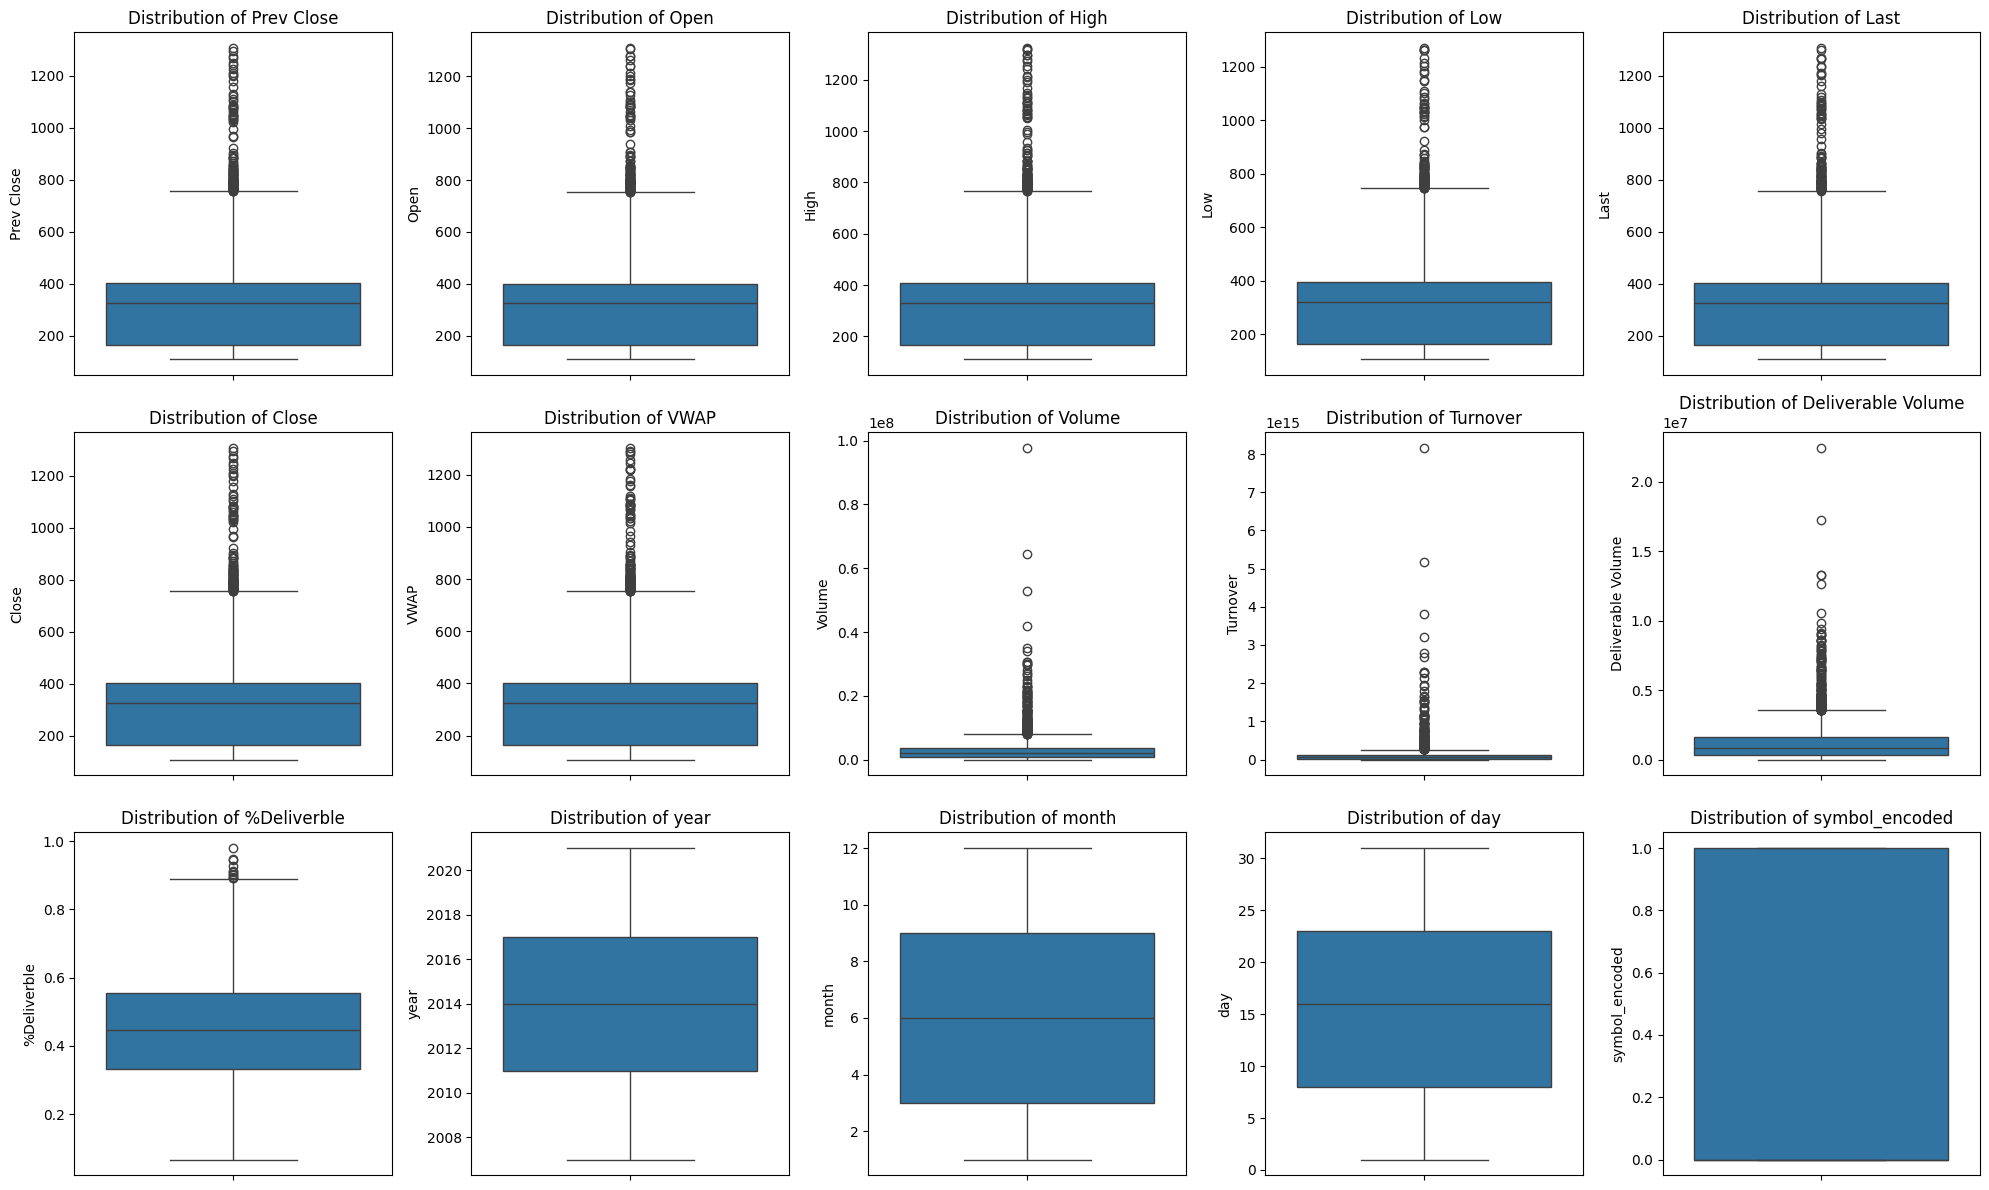

In [29]:
# BOX plot creation to identify the out layers

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns, axes)):
  print(col, ax)
  sns.boxplot(df[col], ax=ax)
  ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [30]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,symbol_encoded
Prev Close,1.000000,0.997228,0.995592,0.996221,0.995130,0.995193,0.995842,0.055715,0.218236,-0.139582,-0.248207,-0.146174,-0.065476,-0.006728,0.390584
Open,0.997228,1.000000,0.998697,0.998741,0.997855,0.997934,0.998748,0.060509,0.225149,-0.135827,-0.249195,-0.146469,-0.064658,-0.006800,0.389834
High,0.995592,0.998697,1.000000,0.997991,0.999045,0.999058,0.999504,0.068102,0.233603,-0.131160,-0.254316,-0.155618,-0.065872,-0.005516,0.396173
Low,0.996221,0.998741,0.997991,1.000000,0.998788,0.998904,0.999184,0.058525,0.223279,-0.136498,-0.249176,-0.138764,-0.061966,-0.006814,0.384664
Last,0.995130,0.997855,0.999045,0.998788,1.000000,0.999961,0.999605,0.066266,0.231077,-0.131522,-0.253037,-0.145256,-0.063921,-0.006318,0.389107
Close,0.995193,0.997934,0.999058,0.998904,0.999961,1.000000,0.999682,0.066464,0.231263,-0.131466,-0.253569,-0.144901,-0.063979,-0.006383,0.389033
VWAP,0.995842,0.998748,0.999504,0.999184,0.999605,0.999682,1.000000,0.064443,0.229894,-0.133324,-0.253705,-0.148080,-0.063556,-0.006147,0.391248
Volume,0.055715,0.060509,0.068102,0.058525,0.066266,0.066464,0.064443,1.000000,0.907914,0.702409,-0.166870,0.469702,-0.051152,0.018172,-0.348773
Turnover,0.218236,0.225149,0.233603,0.223279,0.231077,0.231263,0.229894,0.907914,1.000000,0.428972,-0.229984,0.342289,-0.061784,0.001186,-0.190232
Deliverable Volume,-0.139582,-0.135827,-0.131160,-0.136498,-0.131522,-0.131466,-0.133324,0.702409,0.428972,1.000000,0.275753,0.388710,0.009812,0.072441,-0.380387


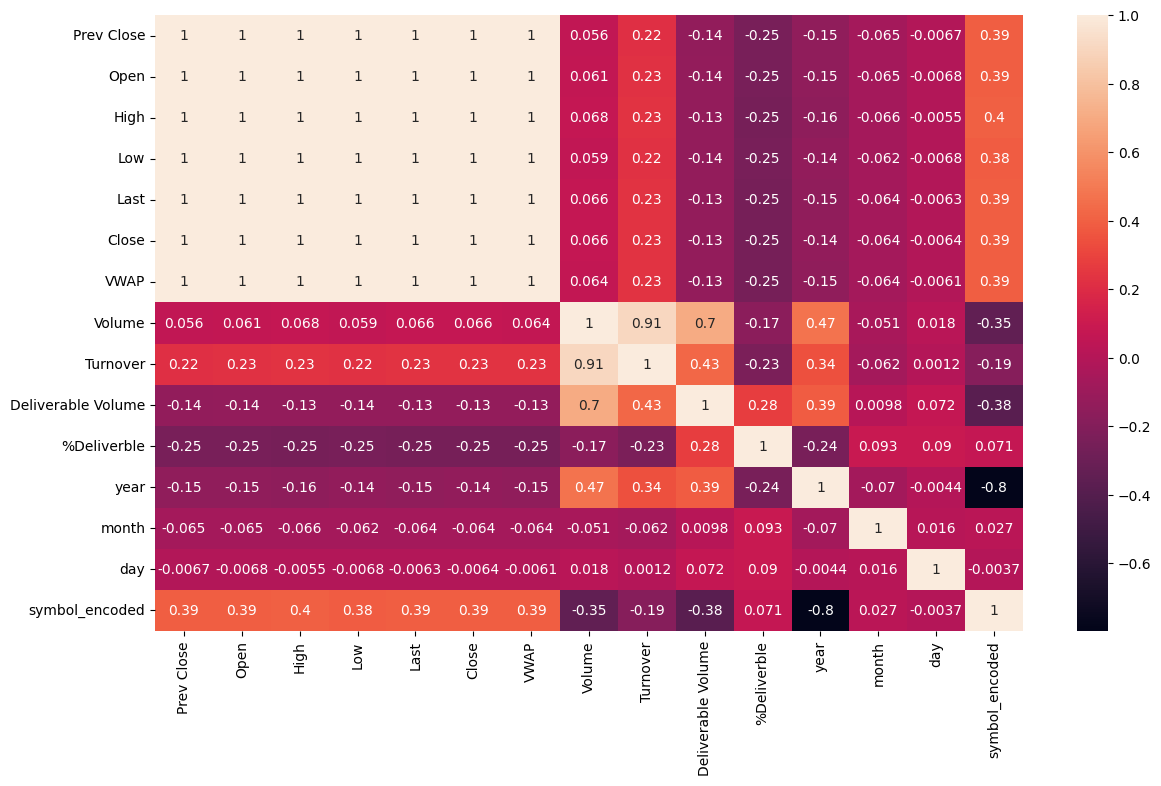

In [33]:
# Heat Map to Understand the Correlation between input and target layers
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
input_data= df.drop(['Close'],axis=1)
output_data= df['Close']
input_data

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,symbol_encoded
0,440.00,770.00,1050.00,770.00,959.0,984.72,27294366,2.687719e+15,9859619,0.3612,2007,11,27,1
1,962.90,984.00,990.00,874.00,885.0,941.38,4581338,4.312765e+14,1453278,0.3172,2007,11,28,1
2,893.90,909.00,914.75,841.00,887.0,888.09,5124121,4.550658e+14,1069678,0.2088,2007,11,29,1
3,884.20,890.00,958.00,890.00,929.0,929.17,4609762,4.283257e+14,1260913,0.2735,2007,11,30,1
4,921.55,939.75,995.00,922.00,980.0,965.65,2977470,2.875200e+14,816123,0.2741,2007,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,725.35,733.00,739.65,728.90,729.2,733.25,9390549,6.885658e+14,838079,0.0892,2021,4,26,0
3318,730.75,735.00,757.50,727.35,748.6,747.67,20573107,1.538191e+15,1779639,0.0865,2021,4,27,0
3319,749.15,755.00,760.00,741.10,743.4,751.02,11156977,8.379106e+14,1342353,0.1203,2021,4,28,0
3320,746.25,753.20,765.85,743.40,746.4,753.06,13851910,1.043139e+15,1304895,0.0942,2021,4,29,0


In [ ]:
input_data_train,input_data_test,output_data_train,output_data_test=train_test_split(input_data,output_data,test_size=0.30,random_state=42)
input_data_test_org=input_data_test
input_data_test_org


,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,year,month,day,symbol_encoded
1057,143.20,144.65,147.00,140.65,144.90,144.00,502716,7.238874e+12,277511,0.5520,2012,3,6,0
812,131.60,131.80,134.50,131.10,132.40,132.71,542303,7.197031e+12,281078,0.5183,2011,3,14,1
2658,378.25,378.55,382.00,375.40,377.55,378.34,1592878,6.026554e+13,433124,0.2719,2018,8,21,0
809,132.70,133.10,134.30,129.65,131.20,131.23,1183691,1.553331e+13,701228,0.5924,2011,3,9,1
862,154.45,154.50,156.90,150.55,151.90,153.13,2623502,4.017483e+13,1862764,0.7100,2011,5,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,127.25,125.50,126.45,124.00,124.90,125.05,754150,9.430984e+12,376421,0.4991,2012,11,1,0
2662,378.65,380.40,388.40,376.15,387.50,382.62,5128415,1.962257e+14,1686272,0.3288,2018,8,28,0
3188,348.95,350.60,353.85,341.25,342.55,348.32,2855273,9.945350e+13,1109178,0.3885,2020,10,15,0
2608,380.50,384.00,387.70,380.10,381.00,384.76,2030226,7.811538e+13,670564,0.3303,2018,6,11,0


In [ ]:
scaler=StandardScaler()
scaler.fit_transform(input_data_train)


array([[ 0.22811797,  0.21954711,  0.19271009, ..., -1.56263941,
         1.29365524, -0.65364821],
       [ 0.24331932,  0.24202659,  0.20749048, ...,  1.02301848,
        -1.22118458, -0.65364821],
       [ 0.2674318 ,  0.27339331,  0.249793  , ..., -0.70075345,
         1.06503343, -0.65364821],
       ...,
       [-0.97671999, -0.97657033, -0.98233156, ..., -1.27534409,
        -0.19238648, -0.65364821],
       [-1.00292921, -1.00270926, -0.99405395, ..., -0.41345813,
         0.95072253,  1.52987491],
       [-0.08717898, -0.10535979, -0.12991033, ...,  0.73572316,
         0.95072253, -0.65364821]])

In [ ]:
stock_prediction_linear_model= LinearRegression()

stock_prediction_linear_model.fit(input_data_train, output_data_train)

LinearRegression()

In [ ]:
import pickle
with open('stock_close_prediction_model.pkl', 'wb') as f:
    pickle.dump(stock_prediction_linear_model, f)

In [ ]:
predicted_data = stock_prediction_linear_model.predict(input_data_test)

In [ ]:
# Performance Evaluation of the model
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(output_data_test,predicted_data)
print(f"Mean Absoute Error={MAE}")

from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(output_data_test,predicted_data)
print(f"Mean Absolute Percentage Error={MAPE}")

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(output_data_test,predicted_data)
print(f"Mean Squared Error={MSE}")

from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(output_data_test,predicted_data)
print(f"Root Means Squared Error={RMSE}")

from sklearn.metrics import r2_score
R2SCORE=r2_score(output_data_test,predicted_data)
print(f"R2SCORE Coefficient of Determination={R2SCORE}")


Mean Absoute Error=3.8040619121651322
Mean Absolute Percentage Error=0.010258262027004637
Mean Squared Error=59.23686505216223
Root Means Squared Error=7.696548905331676
R2SCORE Coefficient of Determination=0.9984886795188895


In [ ]:
with open('stock_close_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

model

LinearRegression()

In [ ]:
predictions=model.predict(input_data_test)

predictions

array([ 143.65032687,  131.96068301,  377.73580283,  131.77122434,
        153.48623126,  365.71929965,  375.81455061,  180.43083568,
        354.7447919 ,  243.90436083,  146.02530019,  379.63723387,
        374.2470303 ,  431.57431161,  580.89063513,  362.87546959,
        367.08622534,  227.18513593,  145.75949317,  270.31545255,
        316.58769812,  364.65780919,  132.69649406,  341.89060189,
        361.8643503 ,  282.90822261,  158.12921833,  365.93561523,
        382.49640645,  164.05861628,  612.49415488,  309.38997939,
        298.54812699,  146.72731959,  120.73845616,  116.38166629,
        422.05345539,  379.01171904,  361.3416334 ,  371.43050412,
        406.70107728,  658.40405137,  364.30519186,  251.15186211,
        227.24495883, 1156.31338172,  316.99658307,  578.81336886,
        274.79725644,  352.65316613,  608.96147641,  639.98831226,
        323.81317763,  142.83230603,  326.68593143,  313.42523216,
        131.4830579 ,  384.22829901,  269.13417167,  659.69442